<a href="https://colab.research.google.com/github/cjayjonathan/285-Machine-Learning-Projects-with-Python/blob/main/Exercise_UP2547457.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification **Exercise**

In [1]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Data and View the Columns
Diabetes = pd.read_csv('/content/diabetes.csv')
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Check for data type
Diabetes.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [4]:
# Inspect the columns
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Check for null values
Diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Compute Pearson correlation matrix for all numeric features in the Diabetes dataset

pearsoncorr = Diabetes.corr(method='pearson',numeric_only=True)

<Axes: >

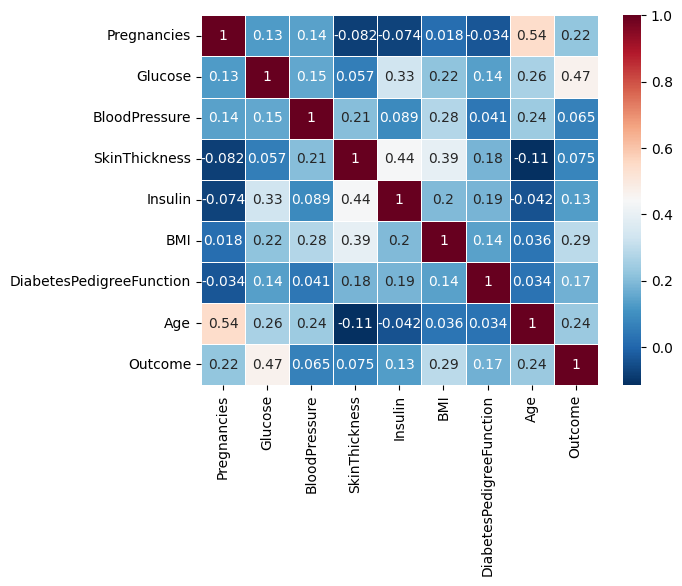

In [7]:
# Plot a heatmap of the Pearson correlation matrix to visualize relationships between numeric features

import seaborn as sb
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [8]:
# Separate features (X) and target variable (y) from the Diabetes dataset for model training
X = Diabetes.drop('Outcome', axis=1)
print('The values of the inputs are :',X)
y = Diabetes['Outcome']
print('The values of target are :',y)

The values of the inputs are :      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1     

In [9]:
# Split the dataset into training and testing sets (80/20) and display the shape of each subset

X_train, X_test, Y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", Y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (614, 8)
X_test Shape  :  (154, 8)
y_train Shape :  (614,)
y_test Shape  :  (154,)


In [10]:
# Apply Min-Max scaling to normalize feature values in training and testing sets

min_max_scaler = preprocessing.MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

In [11]:
# Train a Logistic Regression model with increased iteration limit to ensure convergence
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Predict outcomes using the trained Logistic Regression model and generate the confusion matrix to evaluate classification performance

ylrpredicted=lr.predict(X_test)
cm = confusion_matrix(y_test, ylrpredicted)
print(cm)

[[99  8]
 [20 27]]


<Axes: >

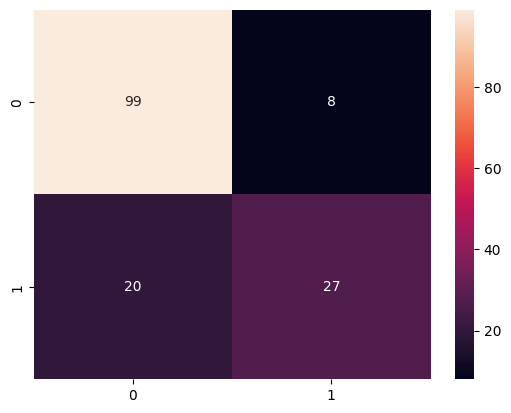

In [13]:
# Visualize the confusion matrix using a heatmap to highlight correct and incorrect predictions
import seaborn as sns
sns.heatmap(cm, annot=True)

In [14]:
# Generate classification report and compute accuracy and weighted F1-score for Logistic Regression predictions
print(classification_report(y_test, ylrpredicted))
print("Accuracy:", accuracy_score(y_test, ylrpredicted))
print("F1_score:",f1_score(y_test, ylrpredicted, average='weighted'))
F1_LR=f1_score(y_test, ylrpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Accuracy: 0.8181818181818182
F1_score: 0.8097050801561918


In [15]:
# Train a Support Vector Classifier using a polynomial kernel; alternative kernels (RBF, linear) are commented for comparison
svm = SVC(kernel='poly')
# svm=SVC(kernel='rbf')#default
# svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='poly')

In [16]:
# Predict outcomes using the trained SVM model and generate the confusion matrix to assess classification performance
ysvmpredicted=svm.predict(X_test)
cm=confusion_matrix(y_test,ysvmpredicted)
print(cm)

[[97 10]
 [22 25]]


<Axes: >

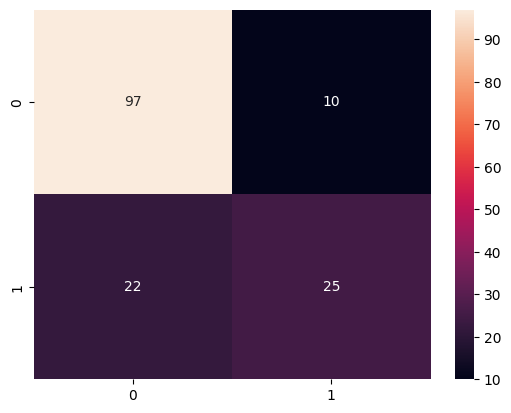

In [17]:
# Visualize the confusion matrix using a heatmap to highlight correct and incorrect predictions
import seaborn as sns
sns.heatmap(cm, annot=True)

In [18]:

# Generate classification report and compute accuracy and weighted F1-score for SVM predictions
print(classification_report(y_test, ysvmpredicted))
print("Accuracy:", accuracy_score(y_test, ysvmpredicted))
print("F1_score:",f1_score(y_test, ysvmpredicted, average='weighted'))
F1_svm=f1_score(y_test, ysvmpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.71      0.53      0.61        47

    accuracy                           0.79       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

Accuracy: 0.7922077922077922
F1_score: 0.7825200916070763


In [19]:
# Train a Decision Tree Classifier using default parameters.
# Alternative configuration with max depth and entropy criterion is commented for tuning

tree = DecisionTreeClassifier()
#tree = DecisionTreeClassifier(max_depth=5,criterion="entropy")
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [20]:
# Predict outcomes using the trained Decision Tree Classifier and generate the confusion matrix to evaluate classification performance
ytreepredicted = tree.predict(X_test)
cm=confusion_matrix(y_test,ytreepredicted)
print(cm)

[[89 18]
 [12 35]]


<Axes: >

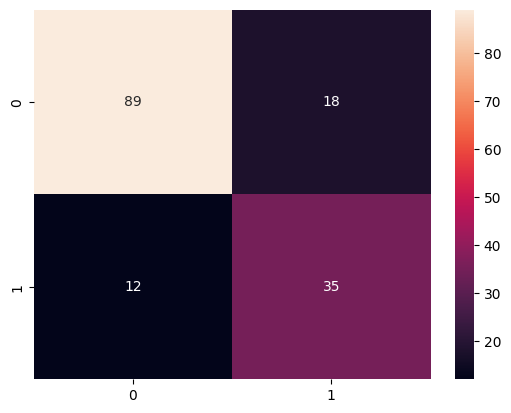

In [21]:
# Visualize the confusion matrix for Decision Tree predictions using a heatmap with annotated cell values
import seaborn as sns
sns.heatmap(cm, annot=True)

In [22]:
# Generate classification report and compute accuracy and weighted F1-score for Decision Tree predictions
print(classification_report(y_test, ytreepredicted))
print("Accuracy:", accuracy_score(y_test, ytreepredicted))
print("F1_score:",f1_score(y_test, ytreepredicted, average='weighted'))
F1_tree=f1_score(y_test, ytreepredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.66      0.74      0.70        47

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.81      0.81      0.81       154

Accuracy: 0.8051948051948052
F1_score: 0.8082292707292706


In [23]:
# Initialize the K-Nearest Neighbors classifier with k=14 neighbors for majority voting
k=14
KNN = KNeighborsClassifier(n_neighbors =14)

In [24]:
# Train the K-Nearest Neighbors classifier on the normalized training data
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [25]:
# Predict outcomes using the trained KNN model and generate the confusion matrix to evaluate classification performance
yknnpredicted = KNN.predict(X_test)
cm=confusion_matrix(y_test,yknnpredicted)
print(cm)

[[96 11]
 [23 24]]


<Axes: >

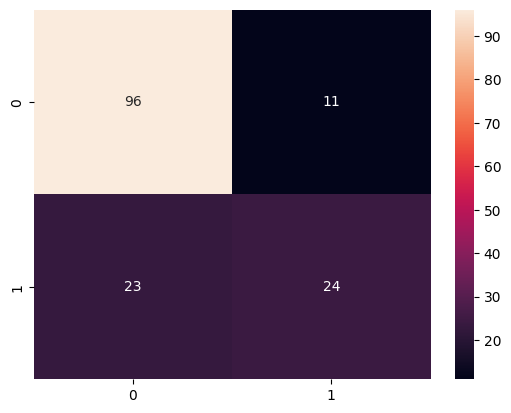

In [26]:
# Visualize the confusion matrix for KNN predictions using a heatmap with annotated cell values
import seaborn as sns
sns.heatmap(cm, annot=True)

In [27]:
# Generate classification report and compute accuracy and weighted F1-score for KNN predictions
print(classification_report(y_test, yknnpredicted))
print("Accuracy:", accuracy_score(y_test, yknnpredicted))
print("F1_score:",f1_score(y_test, yknnpredicted, average='weighted'))
F1_knn=f1_score(y_test, yknnpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.69      0.51      0.59        47

    accuracy                           0.78       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.77      0.78      0.77       154

Accuracy: 0.7792207792207793
F1_score: 0.7689275973325185


In [28]:
# Train a Random Forest Classifier using default parameters to build an ensemble of decision trees
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
# Predict outcomes using the trained Random Forest model and generate the confusion matrix to evaluate classification performance
yrfpredicted=rf.predict(X_test)
cm=confusion_matrix(y_test,yrfpredicted)
print(cm)

[[95 12]
 [17 30]]


<Axes: >

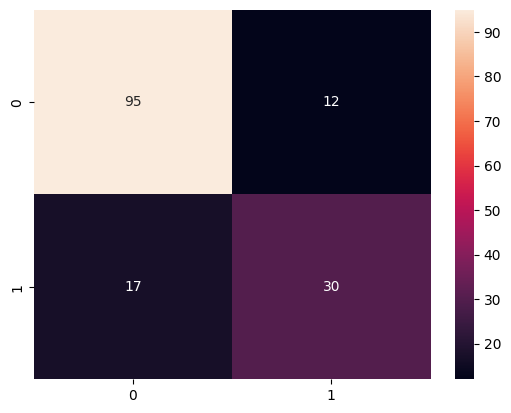

In [30]:
# Visualize the confusion matrix for Random Forest predictions using a heatmap with annotated cell values
import seaborn as sns
sns.heatmap(cm, annot=True)

In [31]:
# Generate classification report and compute accuracy and weighted F1-score for Random Forest predictions
print(classification_report(y_test, yrfpredicted))
print("Accuracy:", accuracy_score(y_test, yrfpredicted))
print("F1_score:",f1_score(y_test, yrfpredicted, average='weighted'))
F1_rf=f1_score(y_test, yrfpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154

Accuracy: 0.8116883116883117
F1_score: 0.8085483343294642


In [32]:
# Train a Gradient Boosting Classifier using default parameters to build an ensemble of weak learners for improved accuracy
GB= GradientBoostingClassifier()
GB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [33]:
# Predict outcomes using the trained Gradient Boosting model and generate the confusion matrix to evaluate classification performance
yGBpredicted=GB.predict(X_test)
cm=confusion_matrix(y_test,yGBpredicted)
print(cm)

[[93 14]
 [14 33]]


<Axes: >

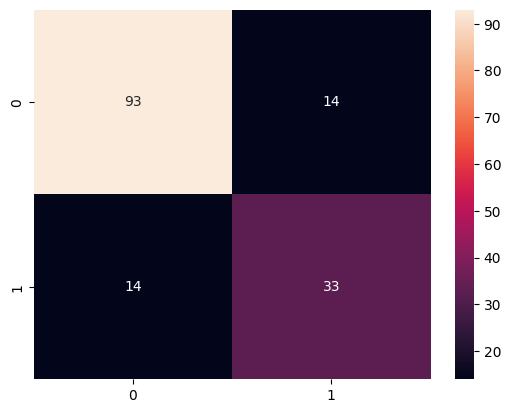

In [34]:
# Visualize the confusion matrix for Gradient Boosting predictions using a heatmap with annotated cell values
import seaborn as sns
sns.heatmap(cm, annot=True)

In [35]:
# Generate classification report and compute accuracy and weighted F1-score for Gradient Boosting predictions
print(classification_report(y_test, yGBpredicted))
print("Accuracy:", accuracy_score(y_test, yGBpredicted))
print("F1_score:",f1_score(y_test, yGBpredicted, average='weighted'))
F1_GB=f1_score(y_test, yGBpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

Accuracy: 0.8181818181818182
F1_score: 0.8181818181818182


In [36]:
# Create a DataFrame to compare F1 scores across classification models and sort them in descending order of performance
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
F1_score = [F1_LR, F1_svm, F1_tree, F1_knn,F1_rf,F1_GB]
compare_models = pd.DataFrame({ 'Algorithms': models, 'F1 Score': F1_score })
compare_models.sort_values(by = 'F1 Score', ascending = False)

,Algorithms,F1 Score
5,Gradient boosted tree,0.818182
0,Logistic Regression,0.809705
4,Random Forest,0.808548
2,Decision Tree,0.808229
1,SVM,0.782520
3,KNN,0.768928


In [37]:
print(compare_models.columns)

Index(['Algorithms', 'F1 Score'], dtype='object')


/tmp/ipython-input-2135994585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Algorithms', data=compare_models, palette='viridis')


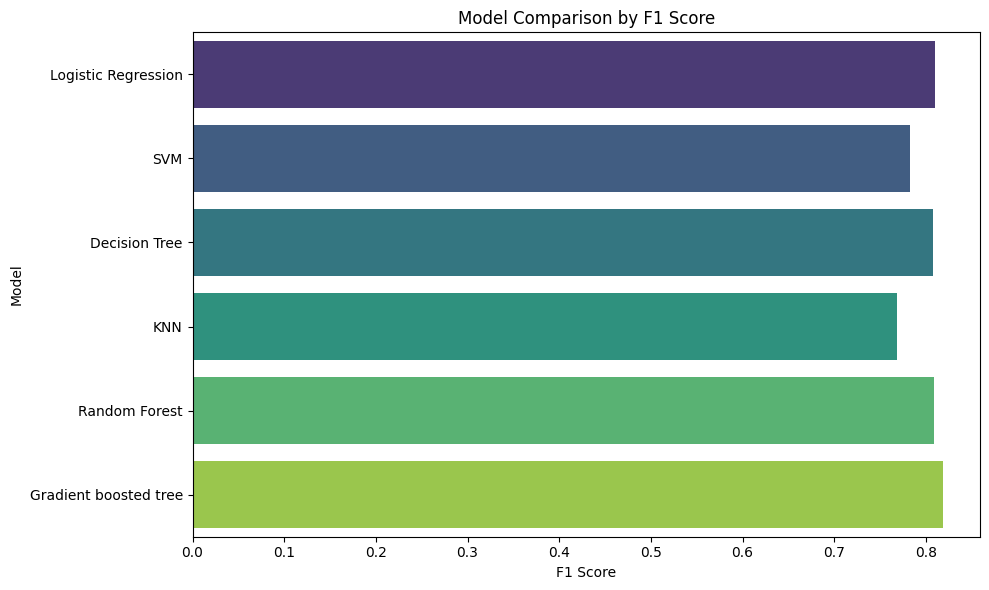

In [38]:
# Visualize the comparison
plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Algorithms', data=compare_models, palette='viridis')
plt.title('Model Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


# **Data Quality & Preprocessing Improvements**

In [40]:
# Check for invalid zeros in biological features
import numpy as np
print("Rows with zero values in key features:")
print("Glucose:", (Diabetes['Glucose'] == 0).sum())
print("BloodPressure:", (Diabetes['BloodPressure'] == 0).sum())
print("BMI:", (Diabetes['BMI'] == 0).sum())

# Handle invalid zeros by replacing with median
from sklearn.impute import SimpleImputer

# Replace zeros with NaN in features where zero is biologically impossible
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Diabetes[columns_to_fix] = Diabetes[columns_to_fix].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
Diabetes[columns_to_fix] = imputer.fit_transform(Diabetes[columns_to_fix])

Rows with zero values in key features:
Glucose: 5
BloodPressure: 35
BMI: 11


# **Feature Engineering**

In [41]:
# Create new informative features
Diabetes['BMI_Category'] = pd.cut(Diabetes['BMI'],
                                 bins=[0, 18.5, 25, 30, 100],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

Diabetes['Age_Group'] = pd.cut(Diabetes['Age'],
                              bins=[0, 30, 45, 60, 100],
                              labels=['Young', 'Adult', 'Middle', 'Senior'])

Diabetes['Glucose_BP_Ratio'] = Diabetes['Glucose'] / Diabetes['BloodPressure']
Diabetes['BMI_Age_Interaction'] = Diabetes['BMI'] * Diabetes['Age']

# Convert categorical to dummy variables
Diabetes = pd.get_dummies(Diabetes, columns=['BMI_Category', 'Age_Group'], drop_first=True)

# **Handling Class Imbalance**

In [43]:
# Check class distribution
print("Class distribution:")
print(Diabetes['Outcome'].value_counts())

# Apply Synthetic Minority Over-sampling Technique (SMOTE) for balanced classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

print("Resampled class distribution:", pd.Series(y_resampled).value_counts())

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Resampled class distribution: Outcome
1    393
0    393
Name: count, dtype: int64


# **Enhanced Model Training with Hyperparameter Tuning**

In [44]:
from sklearn.model_selection import GridSearchCV

# Enhanced Random Forest with tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid.fit(X_resampled, y_resampled)

print("Best RF Parameters:", rf_grid.best_params_)
yrf_predicted = rf_grid.predict(X_test)

Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# **Advanced Gradient Boosting**

In [45]:
# Enhanced Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='f1_weighted', n_jobs=-1)
gb_grid.fit(X_resampled, y_resampled)

print("Best GB Parameters:", gb_grid.best_params_)
ygb_predicted = gb_grid.predict(X_test)

Best GB Parameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}


# **Feature Importance Analysis**

Top 10 Most Important Features:
                    feature  importance
1                   Glucose    0.247610
5                       BMI    0.168301
7                       Age    0.155978
6  DiabetesPedigreeFunction    0.122052
2             BloodPressure    0.084355
0               Pregnancies    0.083073
3             SkinThickness    0.071103
4                   Insulin    0.067527


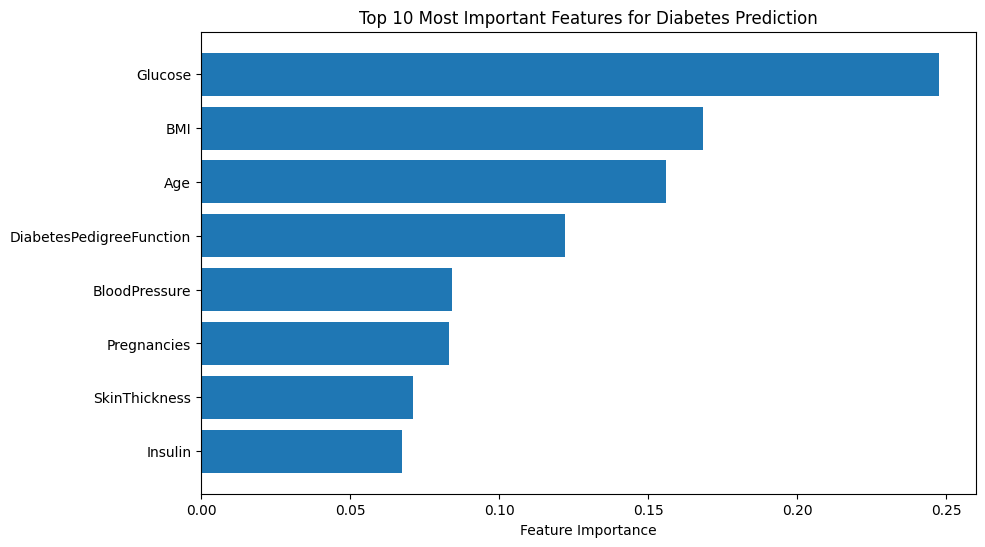

In [46]:
# Analyze feature importance from best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features for Diabetes Prediction')
plt.gca().invert_yaxis()
plt.show()

# **Comprehensive Model Evaluation**

In [47]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {'Accuracy': accuracy, 'F1_Score': f1, 'AUC_ROC': auc}

# Evaluate all models
models = {
    'Random Forest': rf_grid.best_estimator_,
    'Gradient Boosting': gb_grid.best_estimator_,
    'Logistic Regression': lr
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test, name)


Random Forest Performance:
Accuracy: 0.8312
F1 Score: 0.8330
AUC-ROC: 0.8522

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.71      0.77      0.73        47

    accuracy                           0.83       154
   macro avg       0.80      0.81      0.81       154
weighted avg       0.84      0.83      0.83       154


Gradient Boosting Performance:
Accuracy: 0.7532
F1 Score: 0.7581
AUC-ROC: 0.8220

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.58      0.68      0.63        47

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154


Logistic Regression Performance:
Accuracy: 0.8182
F1 Score: 0.8097
AUC-ROC: 0.8680

Classification Report:
              precision    rec

# **Final Model Comparison**


FINAL MODEL COMPARISON
                     Accuracy  F1_Score   AUC_ROC
Random Forest        0.831169  0.833006  0.852157
Logistic Regression  0.818182  0.809705  0.867966
Gradient Boosting    0.753247  0.758132  0.822032


<Figure size 1000x600 with 0 Axes>

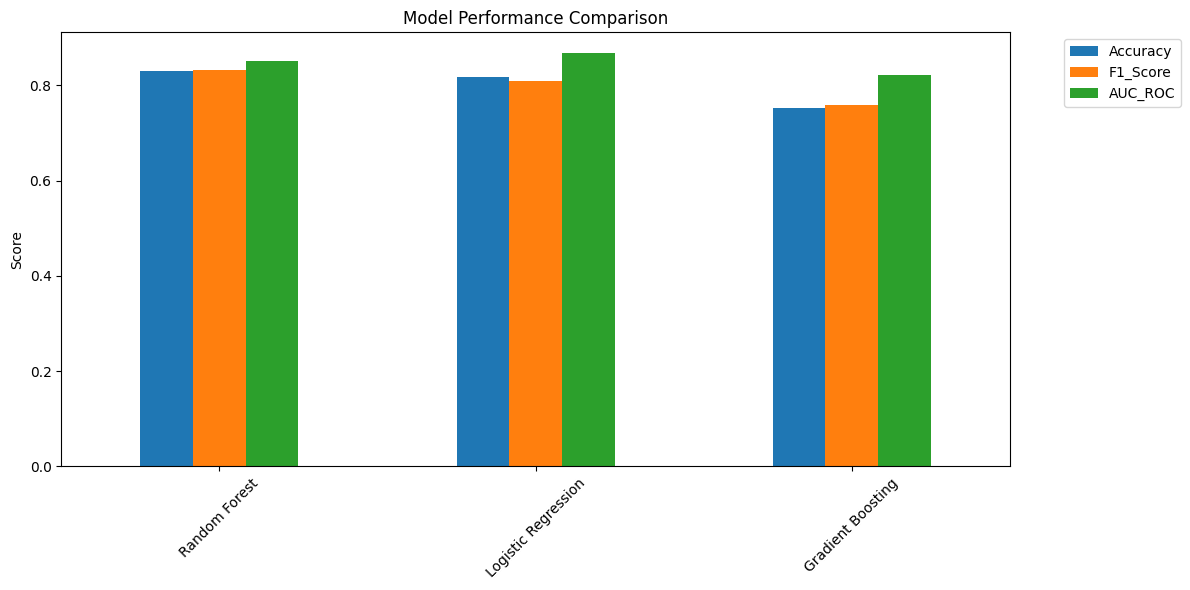

In [48]:
# Comparison
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1_Score', ascending=False)

print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)
print(results_df)

# Plot comparison
plt.figure(figsize=(10, 6))
results_df[['Accuracy', 'F1_Score', 'AUC_ROC']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()